In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

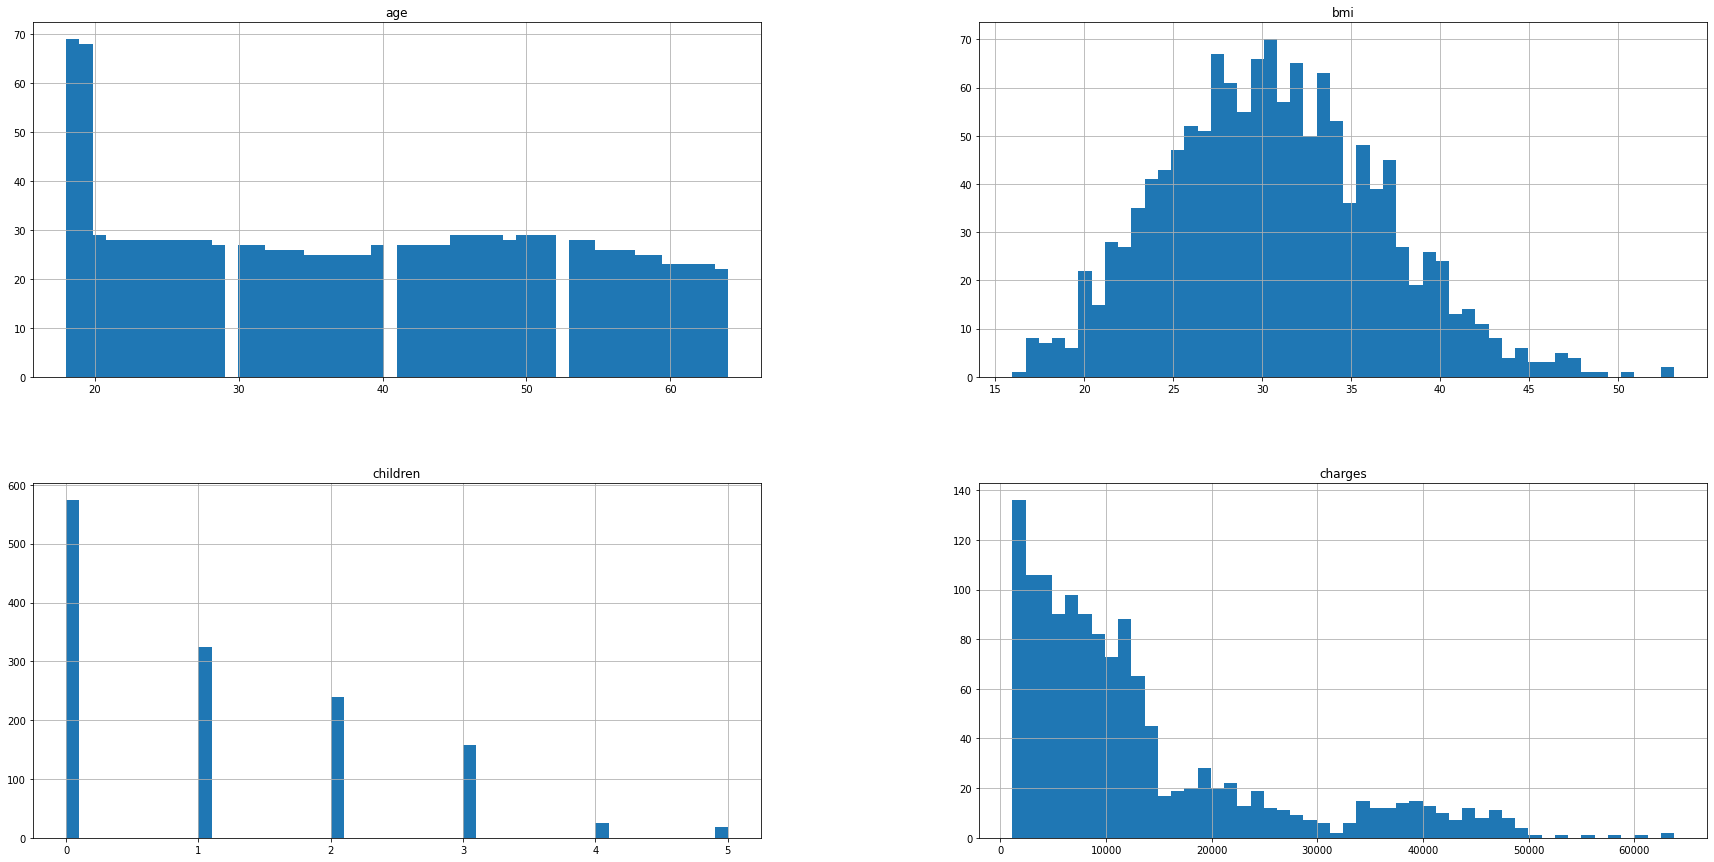

In [7]:
import matplotlib.pyplot as plt
insurance.hist(bins= 50, figsize=(30,15))

<AxesSubplot:xlabel='age', ylabel='bmi'>

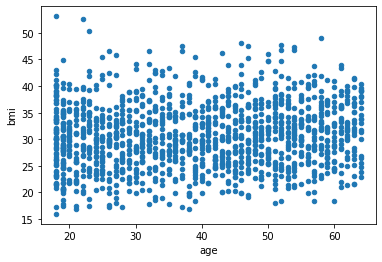

In [8]:
insurance.plot.scatter(x='age', y='bmi')

<AxesSubplot:xlabel='age'>

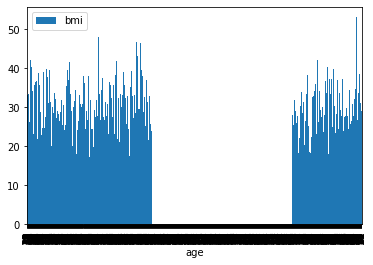

In [9]:
insurance.plot.bar(x='age', y='bmi')

age    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

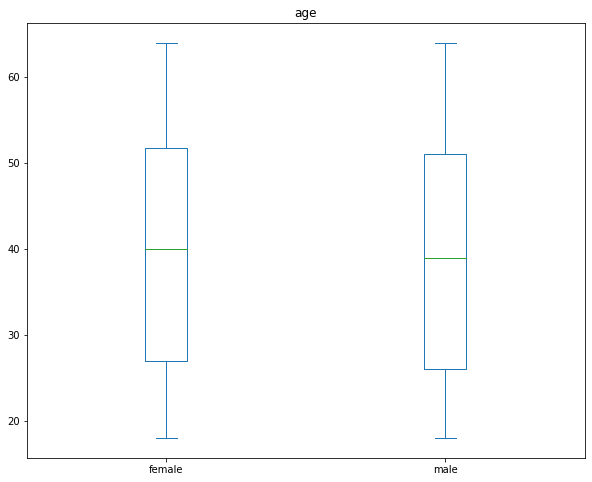

In [10]:
insurance.plot.box(column="age", by="sex", figsize=(10, 8))

In [11]:
insurance.shape

(1338, 7)

In [12]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# Correlation

In [13]:
corr_matrix = insurance.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

# Preprocessing= Encoding Non numeric

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [15]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [17]:
insurance['sex'].unique()

array(['female', 'male'], dtype=object)

In [18]:
insurance['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [20]:
insurance['sex']= label_encoder.fit_transform(insurance['sex'])
insurance['smoker']= label_encoder.fit_transform(insurance['smoker'])
insurance['region']= label_encoder.fit_transform(insurance['region'])

In [21]:
insurance['sex'].unique()

array([0, 1])

In [22]:
insurance['smoker'].unique()

array([1, 0])

In [23]:
insurance['region'].unique()

array([3, 2, 1, 0])

In [24]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
corr_matrix = insurance.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

array([[<AxesSubplot:xlabel='charges', ylabel='charges'>,
        <AxesSubplot:xlabel='smoker', ylabel='charges'>,
        <AxesSubplot:xlabel='sex', ylabel='charges'>,
        <AxesSubplot:xlabel='region', ylabel='charges'>],
       [<AxesSubplot:xlabel='charges', ylabel='smoker'>,
        <AxesSubplot:xlabel='smoker', ylabel='smoker'>,
        <AxesSubplot:xlabel='sex', ylabel='smoker'>,
        <AxesSubplot:xlabel='region', ylabel='smoker'>],
       [<AxesSubplot:xlabel='charges', ylabel='sex'>,
        <AxesSubplot:xlabel='smoker', ylabel='sex'>,
        <AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='region', ylabel='sex'>],
       [<AxesSubplot:xlabel='charges', ylabel='region'>,
        <AxesSubplot:xlabel='smoker', ylabel='region'>,
        <AxesSubplot:xlabel='sex', ylabel='region'>,
        <AxesSubplot:xlabel='region', ylabel='region'>]], dtype=object)

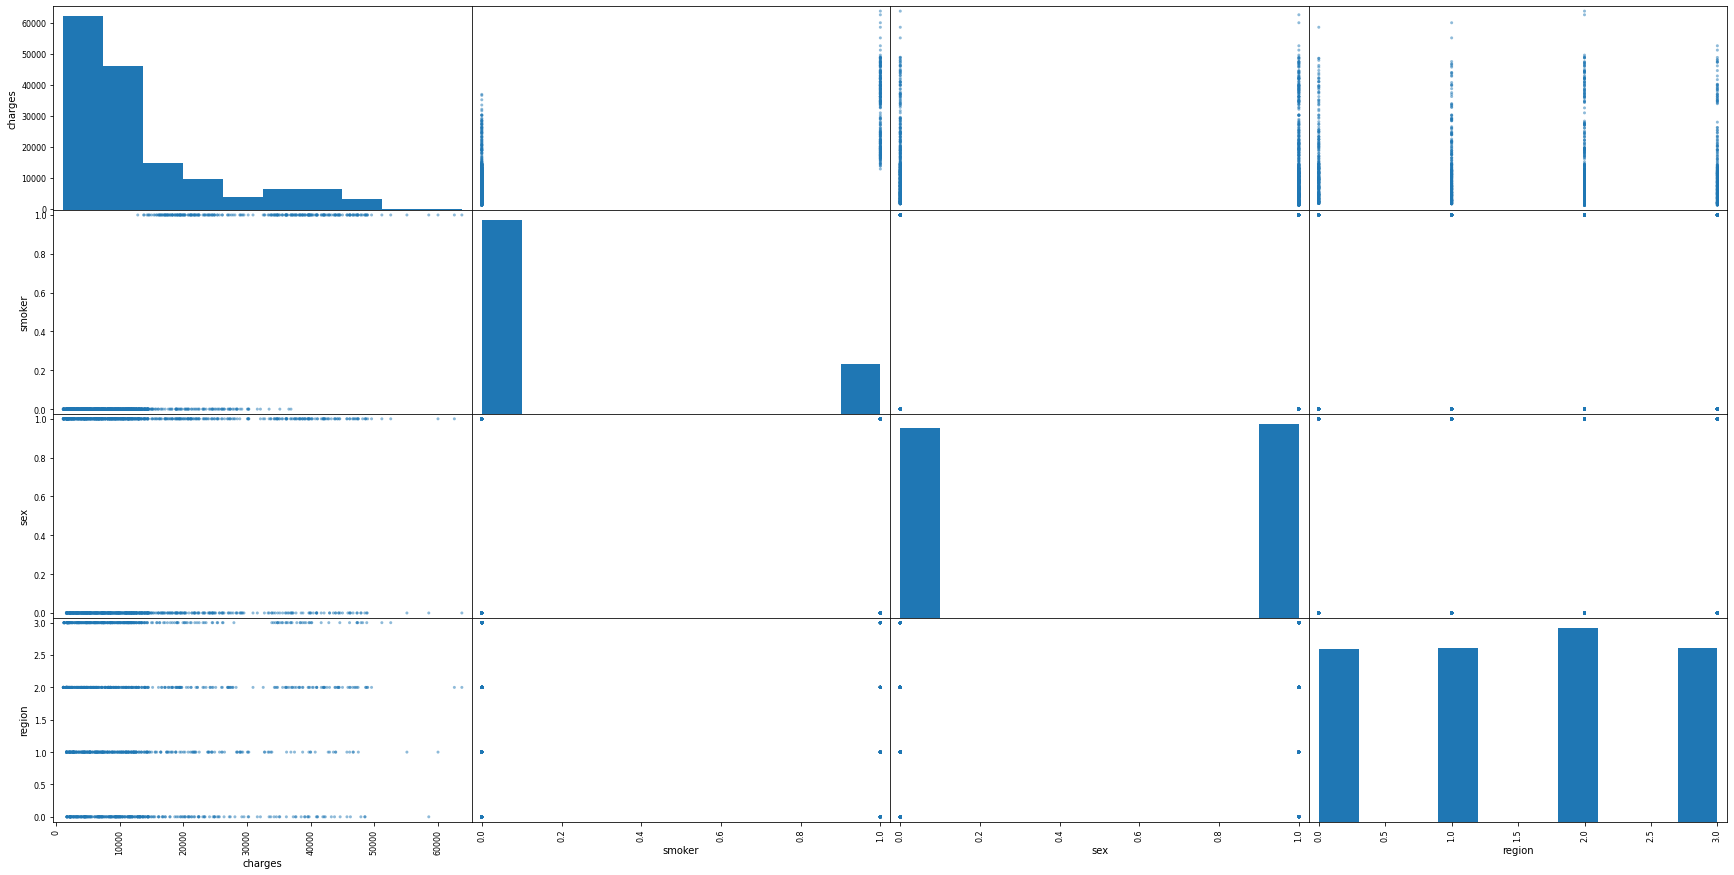

In [26]:
from pandas.plotting import scatter_matrix
attribute= ['charges','smoker','sex','region']
scatter_matrix(insurance[attribute], figsize=(30,15))

<AxesSubplot:xlabel='smoker', ylabel='charges'>

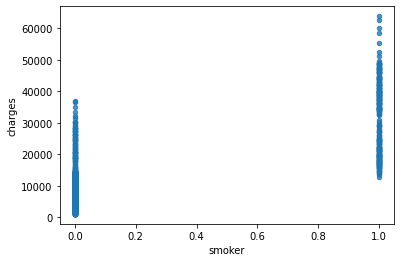

In [27]:
insurance.plot(kind= 'scatter', x='smoker',y='charges', alpha= 0.8)

<AxesSubplot:xlabel='bmi', ylabel='region'>

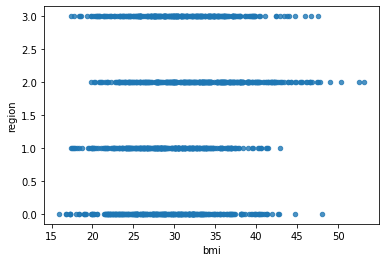

In [28]:
insurance.plot(kind= 'scatter', x='bmi',y='region', alpha= 0.8)

# Train test split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_set, test_set = train_test_split(insurance, test_size=0.2, random_state= 42)

In [31]:
train_set.shape

(1070, 7)

In [32]:
test_set.shape

(268, 7)

In [33]:
train_set.head()

,age,sex,bmi,children,smoker,region,charges
560,46,0,19.95,2,0,1,9193.83850
1285,47,0,24.32,0,0,0,8534.67180
1142,52,0,24.86,0,0,2,27117.99378
969,39,0,34.32,5,0,2,8596.82780
486,54,0,21.47,3,0,1,12475.35130


# Shuffling of binary features

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(insurance, insurance['sex'], insurance['smoker']):
    strat_trainSet = insurance.loc[train_index]
    strat_testSet = insurance.loc[test_index]

In [35]:
strat_trainSet['sex'].value_counts()

1    541
0    529
Name: sex, dtype: int64

In [36]:
strat_testSet['sex'].value_counts()

1    135
0    133
Name: sex, dtype: int64

In [37]:
strat_trainSet['region'].value_counts()

2    294
0    267
3    257
1    252
Name: region, dtype: int64

In [38]:
strat_testSet['region'].value_counts()

1    73
2    70
3    68
0    57
Name: region, dtype: int64

# Splitting features and labels

In [39]:
x_train= strat_trainSet.drop('charges', axis=1)
y_train = strat_trainSet['charges'].copy()

In [40]:
x_train.shape

(1070, 6)

In [41]:
y_train.shape

(1070,)

# Pipeline

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [43]:
insurance_tr = my_pipeline.fit_transform(x_train)

In [44]:
insurance_tr

array([[ 1.12829229, -1.01127855, -0.65294162, -0.07261591, -0.49853929,
         1.34777285],
       [-1.17538857, -1.01127855, -1.24367712,  0.76285743, -0.49853929,
        -0.45600069],
       [ 1.63222248,  0.98884723,  1.48969846, -0.90808924, -0.49853929,
         0.44588608],
       ...,
       [ 0.19242194,  0.98884723, -0.40652985,  1.59833076,  2.00585996,
        -0.45600069],
       [ 0.6243621 , -1.01127855, -0.57705985, -0.07261591, -0.49853929,
        -1.35788746],
       [ 0.19242194,  0.98884723, -1.01113621,  0.76285743,  2.00585996,
        -1.35788746]])

# Model Selection

In [45]:
# from sklearn.linear_model import LinearRegression
# model= LinearRegression()
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(insurance_tr, y_train)
model.score(insurance_tr, y_train)

0.9771510425258998

# Predicting labels for 1st five data

In [46]:
some_data = x_train.iloc[:5]
some_labels= y_train.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([25540.053393 , 13356.6146145, 13145.9427544,  9915.2427338,
       15356.5793673])

In [49]:
list(some_labels)

[35160.13457, 14426.07385, 12982.8747, 8782.469, 13217.0945]

# Evaluation using mean sq. error

In [50]:
from sklearn.metrics import mean_squared_error
import numpy  as np

In [51]:
insurance_predictions = model.predict(insurance_tr)
mse= mean_squared_error(y_train, insurance_predictions)
rmse = np.sqrt(mse)


In [52]:
rmse

1825.7857636837716

# Using better Evaluation Method- Cross VAL.

In [53]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model, insurance_tr, y_train, scoring= 'neg_mean_squared_error', cv=10)
rmse_scores= np.sqrt(-scores)

In [54]:
rmse_scores

array([5482.63519096, 4576.01606968, 4082.6579218 , 5049.77713141,
       5663.14122769, 4675.01851034, 4840.48656317, 4587.12481421,
       4026.21020775, 4410.3407186 ])

In [55]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation", scores.std())

In [56]:
print_scores(rmse_scores)

Scores: [5482.63519096 4576.01606968 4082.6579218  5049.77713141 5663.14122769
 4675.01851034 4840.48656317 4587.12481421 4026.21020775 4410.3407186 ]
Mean: 4739.340835561983
Standard Deviation 511.32237303032935
